# Import Data

In [1]:
import pandas as pd

In [2]:
# recompute tresholds for when gaze is on one of the character (standard/exact box should be 40):
def recompute_treshold(df, thresh):
    df.loc[(df["gaze_to_human"] > thresh) & (df["gaze_to_ai"] > thresh),"Gaze_focus"] = "Env"
    df.loc[(df["gaze_to_human"] < thresh) & (df["gaze_to_ai"] > thresh),"Gaze_focus"] = "Human"
    df.loc[(df["gaze_to_human"] > thresh) & (df["gaze_to_ai"] < thresh),"Gaze_focus"] = "AI"
    df.loc[(df["gaze_to_human"] < thresh) & (df["gaze_to_ai"] < thresh) & (df["gaze_to_human"] < df["gaze_to_ai"]),"Gaze_focus"] = "Human"
    df.loc[(df["gaze_to_human"] < thresh) & (df["gaze_to_ai"] < thresh) & (df["gaze_to_human"] > df["gaze_to_ai"]),"Gaze_focus"] = "AI"
    return df

In [110]:
# read in merged csvs
threshold = 80
path = "gaze_agent_merged/"
data = {}

for i in range(1,36):
    if i not in [11, 24, 26, 32, 34]:
        if i<10:
            participant="P0"+str(i)
        else:
            participant="P"+str(i)
            data[participant]={}
        # add dict entry
        data[participant]={}
        
        data[participant]["000"]=recompute_treshold(pd.read_csv(path+participant+"_000_merged.csv", sep=";"), threshold)
        data[participant]["001"]=recompute_treshold(pd.read_csv(path+participant+"_001_merged.csv", sep=";"), threshold)
    

In [111]:
# check if all 30 are read in
print(len(data), "files were loaded")

30 files were loaded


In [112]:
# sanity check
data["P01"]["001"].head()

,Unnamed: 0,norm_pos_x,norm_pos_y,Human x,Human y,Agent x,Agent y,Frame number,gaze_to_human,gaze_to_ai,Gaze_focus,Condition
0,17,647.758690,193.043993,734.0,329,589.0,330,17,161.001861,149.028626,Env,Confusion
1,18,488.885407,397.716899,734.0,329,642.5,320,18,254.564679,172.155045,Env,Confusion
2,19,491.247234,394.674239,733.5,329,654.0,320,19,250.997029,179.066203,Env,Confusion
3,20,484.855397,406.854818,734.0,328,658.0,320,20,261.325689,193.708061,Env,Confusion
4,21,659.274050,347.087902,735.0,327,659.5,318,21,78.345028,29.088779,AI,Confusion


# Frame Counts 

In [113]:
counters={"lvl1":{"Gaze":{"AI":0, "Human":0, "Env":0}, 
                  "Condition":{"Error":0, "Confusion":0, "Normal":0}},
          "lvl2":{"Gaze":{"AI":0, "Human":0, "Env":0}, 
                  "Condition":{"Error":0, "Confusion":0, "Normal":0}}
         }


In [114]:
for p in data:
    print(p)
    # add counts for lvl1
    counters["lvl1"]["Gaze"]["AI"]+=(data[p]["000"].Gaze_focus == 'AI').sum()
    counters["lvl1"]["Gaze"]["Human"]+=(data[p]["000"].Gaze_focus == 'Human').sum()
    counters["lvl1"]["Gaze"]["Env"]+=(data[p]["000"].Gaze_focus == 'Env').sum()
    counters["lvl1"]["Condition"]["Error"]+=(data[p]["000"].Condition == 'Error').sum()
    counters["lvl1"]["Condition"]["Confusion"]+=(data[p]["000"].Condition == 'Confusion').sum()
    counters["lvl1"]["Condition"]["Normal"]+=(data[p]["000"].Condition == 'Normal').sum()
    
    # add counts for lvl2
    counters["lvl2"]["Gaze"]["AI"]+=(data[p]["001"].Gaze_focus == 'AI').sum()
    counters["lvl2"]["Gaze"]["Human"]+=(data[p]["001"].Gaze_focus == 'Human').sum()
    counters["lvl2"]["Gaze"]["Env"]+=(data[p]["001"].Gaze_focus == 'Env').sum()
    counters["lvl2"]["Condition"]["Error"]+=(data[p]["001"].Condition == 'Error').sum()
    counters["lvl2"]["Condition"]["Confusion"]+=(data[p]["001"].Condition == 'Confusion').sum()
    counters["lvl2"]["Condition"]["Normal"]+=(data[p]["001"].Condition == 'Normal').sum()
    
counters    

P01
P02
P03
P04
P05
P06
P07
P08
P09
P10
P12
P13
P14
P15
P16
P17
P18
P19
P20
P21
P22
P23
P25
P27
P28
P29
P30
P31
P33
P35


{'lvl1': {'Gaze': {'AI': 2965, 'Human': 18540, 'Env': 9850},
  'Condition': {'Error': 1872, 'Confusion': 12672, 'Normal': 16811}},
 'lvl2': {'Gaze': {'AI': 5297, 'Human': 17052, 'Env': 8247},
  'Condition': {'Error': 2115, 'Confusion': 3373, 'Normal': 25108}}}

In [115]:
frames_overall_lvl1=0
for target in counters["lvl1"]["Gaze"]:
    frames_overall_lvl1+=counters["lvl1"]["Gaze"][target]
print(frames_overall_lvl1)

frames_overall_lvl2=0
for target in counters["lvl2"]["Gaze"]:
    frames_overall_lvl2+=counters["lvl2"]["Gaze"][target]
print(frames_overall_lvl2)

print("Overall frame number", frames_overall_lvl1+frames_overall_lvl2)

31355
30596
Overall frame number 61951


In [116]:
print("lvl1")
for target in counters["lvl1"]["Gaze"]:
    print(target, round(counters["lvl1"]["Gaze"][target]/frames_overall_lvl1,3))
print("lvl2")
for target in counters["lvl2"]["Gaze"]:
    print(target, round(counters["lvl2"]["Gaze"][target]/frames_overall_lvl2,3))
    
print("lvl1")
for c in counters["lvl1"]["Condition"]:
    print(c, round(counters["lvl1"]["Condition"][c]/frames_overall_lvl1,3))
print("lvl2")
for c in counters["lvl2"]["Condition"]:
    print(c, round(counters["lvl2"]["Condition"][c]/frames_overall_lvl2,3))

lvl1
AI 0.095
Human 0.591
Env 0.314
lvl2
AI 0.173
Human 0.557
Env 0.27
lvl1
Error 0.06
Confusion 0.404
Normal 0.536
lvl2
Error 0.069
Confusion 0.11
Normal 0.821


In [117]:
#counters={"lvl1":{"Gaze":{"AI":[], "Human":[], "Env":[]}, 
#                  "Condition":{"Error":[], "Confusion":[], "Normal":[]}},
#          "lvl2":{"Gaze":{"AI":[], "Human":[], "Env":[]}, 
#                  "Condition":{"Error":[], "Confusion":[], "Normal":[]}}
#         }
#
#for p in data:
#    print(p)
#    # add counts for lvl1
#    counters["lvl1"]["Gaze"]["AI"].append((data[p]["000"].Gaze_focus == 'AI').sum())
#    counters["lvl1"]["Gaze"]["Human"].append((data[p]["000"].Gaze_focus == 'Human').sum())
#    counters["lvl1"]["Gaze"]["Env"].append((data[p]["000"].Gaze_focus == 'Env').sum())
#    counters["lvl1"]["Condition"]["Error"].append((data[p]["000"].Condition == 'Error').sum())
#    counters["lvl1"]["Condition"]["Confusion"].append((data[p]["000"].Condition == 'Confusion').sum())
#    counters["lvl1"]["Condition"]["Normal"].append((data[p]["000"].Condition == 'Normal').sum())
#    
#    # add counts for lvl2
#    counters["lvl2"]["Gaze"]["AI"].append((data[p]["001"].Gaze_focus == 'AI').sum())
#    counters["lvl2"]["Gaze"]["Human"].append((data[p]["001"].Gaze_focus == 'Human').sum())
#    counters["lvl2"]["Gaze"]["Env"].append((data[p]["001"].Gaze_focus == 'Env').sum())
#    counters["lvl2"]["Condition"]["Error"].append((data[p]["001"].Condition == 'Error').sum())
#    counters["lvl2"]["Condition"]["Confusion"].append((data[p]["001"].Condition == 'Confusion').sum())
#    counters["lvl2"]["Condition"]["Normal"].append((data[p]["001"].Condition == 'Normal').sum())
#    
#counters    

# Compute AoI Analysis for the 3 Conditions

In [118]:
# for each particpant compute the percentage looked at agent/human/env for the different conditions conf/err/bau
for p in data:
    print(p)
    # compute stats
    data[p]["stats"]={}
    lvls_concatenated=pd.concat([data[p]["000"], data[p]["001"]], ignore_index=True, sort=False)
    data[p]["stats"]["overall"]=lvls_concatenated.groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().fillna(0)
    data[p]["stats"]["lvl1"]=data[p]["000"].groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().fillna(0)
    data[p]["stats"]["lvl2"]=data[p]["001"].groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().fillna(0)

P01
P02
P03
P04
P05
P06
P07
P08
P09
P10
P12
P13
P14
P15
P16
P17
P18
P19
P20
P21
P22
P23
P25
P27
P28
P29
P30
P31
P33
P35


<AxesSubplot:xlabel='Condition'>

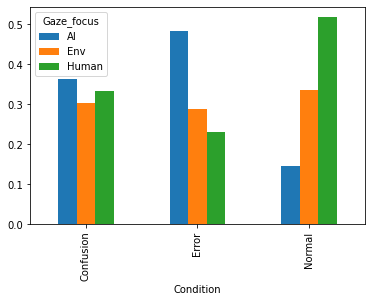

In [119]:
# plot that data for a single sample
data["P02"]["stats"]["lvl2"].plot(kind="bar")

In [120]:
# plot that data averaged over all
list_of_stats=[]
list_of_stats_lvl1=[]
list_of_stats_lvl2=[]
for p in data:
    list_of_stats.append(data[p]["stats"]["overall"])
    list_of_stats_lvl1.append(data[p]["stats"]["lvl1"])
    list_of_stats_lvl2.append(data[p]["stats"]["lvl2"])
list_of_stats

[Gaze_focus        AI       Env     Human
 Condition                               
 Confusion   0.068783  0.380952  0.550265
 Error       0.096296  0.140741  0.762963
 Normal      0.116679  0.179506  0.703815,
 Gaze_focus        AI       Env     Human
 Condition                               
 Confusion   0.144769  0.587591  0.267640
 Error       0.482759  0.287356  0.229885
 Normal      0.181474  0.346881  0.471645,
 Gaze_focus        AI       Env     Human
 Condition                               
 Confusion   0.032366  0.337054  0.630580
 Error       0.285714  0.114286  0.600000
 Normal      0.165318  0.109827  0.724855,
 Gaze_focus        AI       Env     Human
 Condition                               
 Confusion   0.073171  0.653117  0.273713
 Error       0.048951  0.727273  0.223776
 Normal      0.074904  0.626120  0.298976,
 Gaze_focus        AI       Env     Human
 Condition                               
 Confusion   0.132159  0.273128  0.594714
 Error       0.086538  0.23557

In [121]:
stats_overall_concat=pd.concat(list_of_stats)
stats_lvl1_concat=pd.concat(list_of_stats_lvl1)
stats_lvl2_concat=pd.concat(list_of_stats_lvl2)
stats_overall_concat

Gaze_focus,AI,Env,Human
Condition,,,
Confusion,0.068783,0.380952,0.550265
Error,0.096296,0.140741,0.762963
Normal,0.116679,0.179506,0.703815
Confusion,0.144769,0.587591,0.267640
Error,0.482759,0.287356,0.229885
...,...,...,...
Error,0.090909,0.309091,0.600000
Normal,0.121911,0.530478,0.347611
Confusion,0.154639,0.350515,0.494845


In [122]:
by_row_index = stats_overall_concat.groupby(stats_overall_concat.index)
df_means_overall = by_row_index.mean()
df_std_overall = by_row_index.std()
print(df_means_overall)
print(df_std_overall)

Gaze_focus        AI       Env     Human
Condition                               
Confusion   0.137462  0.379750  0.482788
Error       0.249622  0.245256  0.505122
Normal      0.126231  0.258257  0.615513
Gaze_focus        AI       Env     Human
Condition                               
Confusion   0.064137  0.136887  0.125501
Error       0.152001  0.143467  0.188015
Normal      0.052530  0.161464  0.150731


In [123]:
df_means_overall = df_means_overall[['Env', 'Human', 'AI']]
df_means_overall = df_means_overall.rename(columns={"Env":"Environment"},index={"Normal":"Normal Workflow"})
df_means_overall.columns.name="Gaze Focus"

df_std_overall = df_std_overall[['Env', 'Human', 'AI']]
df_std_overall = df_std_overall.rename(columns={"Env":"Environment"}, index={"Normal":"Normal Workflow"})
df_std_overall.columns.name="Gaze Focus"

df_means_overall

Gaze Focus,Environment,Human,AI
Condition,,,
Confusion,0.379750,0.482788,0.137462
Error,0.245256,0.505122,0.249622
Normal Workflow,0.258257,0.615513,0.126231


In [124]:
if threshold==40:
    df_std_overall["AI"]["Error"]=0.095685
    df_std_overall

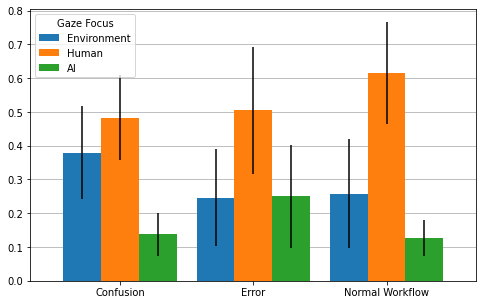

In [125]:
# plot averaged for all participants

import matplotlib.pyplot as plt

ax = df_means_overall.plot(kind="bar", yerr=df_std_overall, rot=0, figsize=(8,5), width=0.85, zorder=3).grid(axis='y')
plt.xlabel("")
plt.savefig('stats_'+str(threshold)+".pdf")
plt.show()



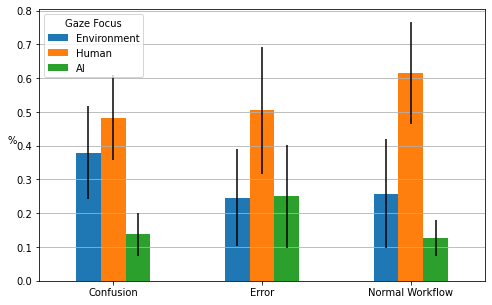

In [126]:
import matplotlib.pyplot as plt
# plot averaged for all participants
ax = df_means_overall.plot(kind="bar", yerr=df_std_overall, rot=0, figsize=(8,5)).grid(axis='y')
plt.xlabel("")
plt.ylabel("%", rotation = 0)
plt.show()

<AxesSubplot:xlabel='Condition'>

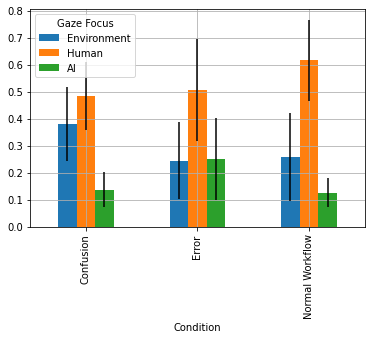

In [127]:
# plot averaged for all participants
df_means_overall.plot(kind="bar", yerr=df_std_overall, grid=True)

<AxesSubplot:xlabel='Condition'>

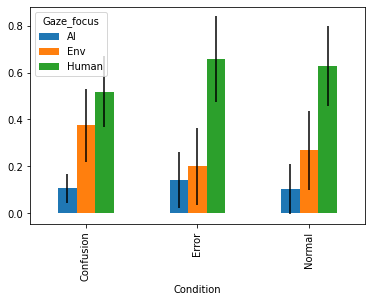

In [128]:
# plot that data averaged over lvl1 
by_row_index_lvl1 = stats_lvl1_concat.groupby(stats_lvl1_concat.index)
df_means_lvl1 = by_row_index_lvl1.mean()
df_std_lvl1 = by_row_index_lvl1.std()
df_means_lvl1.plot(kind="bar", yerr=df_std_lvl1)

In [129]:
df_means_lvl1

Gaze_focus,AI,Env,Human
Condition,,,
Confusion,0.106446,0.374480,0.519073
Error,0.142667,0.199803,0.657530
Normal,0.102885,0.267646,0.629469


In [130]:
df_means_lvl2

Gaze_focus,AI,Env,Human
Condition,,,
Confusion,0.122507,0.758618,0.118875
Error,0.125784,0.672071,0.202146
Normal,0.061143,0.696435,0.242423


<AxesSubplot:xlabel='Condition'>

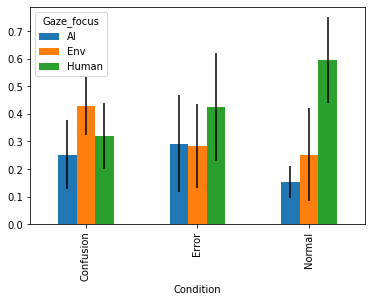

In [131]:
# plot that data averaged over lvl2 
by_row_index_lvl2 = stats_lvl2_concat.groupby(stats_lvl2_concat.index)
df_means_lvl2 = by_row_index_lvl2.mean()
df_std_lvl2 = by_row_index_lvl2.std()
df_means_lvl2.plot(kind="bar", yerr=df_std_lvl2)

<AxesSubplot:ylabel='Condition'>

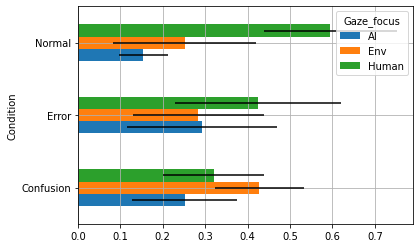

In [132]:
df_means_lvl2.plot(kind="barh", xerr=df_std_lvl2, grid=True)

# Correlations with Performance

Computing the correlations of AoI proportions in full interaction with overall score

In [133]:
from operator import add 
score_lvl1=[20, 0, 0 , 50, 30, 0, 0 ,0, 60, 10, 70, 40, 0, 0, 0, 40, 60, 0, 50, 50, 50, 20, 60, 0, 20, 60, 30, 20, 30, 40]
score_lvl2=[60, 50, 40, 50, 40, 60, 40, 30, 40, 40 ,50, 50, 70, 60, 70, 60, 80, 50, 70, 80, 60, 50, 60, 20, 50, 70, 60, 0, 50, 50]
scores=list(map(add, score_lvl1, score_lvl2))

In [134]:
print(len(score_lvl1), len(score_lvl2), len(scores))
print(scores)

30 30 30
[80, 50, 40, 100, 70, 60, 40, 30, 100, 50, 120, 90, 70, 60, 70, 100, 140, 50, 120, 130, 110, 70, 120, 20, 70, 130, 90, 20, 80, 90]


In [135]:
from scipy.stats.stats import pearsonr   
print(pearsonr(score_lvl1, score_lvl2))

(0.3306514507947479, 0.07431330476016042)


In [136]:
gaze_on_human=[]
gaze_on_agent=[]
gaze_on_env=[]
gaze_on_human_lvl1=[]
gaze_on_agent_lvl1=[]
gaze_on_env_lvl1=[]
gaze_on_human_lvl2=[]
gaze_on_agent_lvl2=[]
gaze_on_env_lvl2=[]

In [137]:
gaze_counters={"lvl1":{"AI":[], "Human":[], "Env":[]},
          "lvl2":{"AI":[], "Human":[], "Env":[]}
         }

for p in data:
    print(p)
    # add counts for lvl1
    gaze_counters["lvl1"]["AI"].append(((data[p]["000"].Gaze_focus == 'AI').sum())/len(data[p]["000"].Gaze_focus))
    gaze_counters["lvl1"]["Human"].append(((data[p]["000"].Gaze_focus == 'Human').sum())/len(data[p]["000"].Gaze_focus))
    gaze_counters["lvl1"]["Env"].append(((data[p]["000"].Gaze_focus == 'Env').sum())/len(data[p]["000"].Gaze_focus))
    # add counts for lvl2
    gaze_counters["lvl2"]["AI"].append(((data[p]["001"].Gaze_focus == 'AI').sum())/len(data[p]["001"].Gaze_focus))
    gaze_counters["lvl2"]["Human"].append(((data[p]["001"].Gaze_focus == 'Human').sum())/len(data[p]["001"].Gaze_focus))
    gaze_counters["lvl2"]["Env"].append(((data[p]["001"].Gaze_focus == 'Env').sum())/len(data[p]["001"].Gaze_focus))

    
gaze_counters    

P01
P02
P03
P04
P05
P06
P07
P08
P09
P10
P12
P13
P14
P15
P16
P17
P18
P19
P20
P21
P22
P23
P25
P27
P28
P29
P30
P31
P33
P35


{'lvl1': {'AI': [0.04655674102812803,
   0.1603960396039604,
   0.034722222222222224,
   0.03333333333333333,
   0.07349896480331262,
   0.03170028818443804,
   0.16651162790697674,
   0.04995287464655985,
   0.1246485473289597,
   0.10206084396467124,
   0.23887814313346228,
   0.12049433573635428,
   0.22301516503122212,
   0.16145833333333334,
   0.19385796545105566,
   0.06820276497695853,
   0.1371326803205699,
   0.1593554162936437,
   0.11100832562442182,
   0.03886255924170616,
   0.07572614107883817,
   0.05588235294117647,
   0.06324110671936758,
   0.04681647940074907,
   0.025540275049115914,
   0.06588003933136677,
   0.047229791099000905,
   0.06165703275529865,
   0.016376663254861822,
   0.0706880301602262],
  'Human': [0.6585838991270611,
   0.28316831683168314,
   0.6567460317460317,
   0.28431372549019607,
   0.6790890269151139,
   0.38808837656099904,
   0.6623255813953488,
   0.5032987747408105,
   0.5248359887535146,
   0.6035328753680078,
   0.5241779497098646,
 

In [138]:
print("Score Lvl1 With Gaze on Agent\t\t", pearsonr(score_lvl1, gaze_counters["lvl1"]["AI"]))
print("Score Lvl2 With Gaze on Agent\t\t",pearsonr(score_lvl2, gaze_counters["lvl2"]["AI"]))
combined_gaze_agent=list(map(add, gaze_counters["lvl2"]["AI"], gaze_counters["lvl1"]["AI"]))
combined_gaze_agent = [i/2 for i in combined_gaze_agent]
print("Score Overall With Gaze on Agent\t", pearsonr(scores, combined_gaze_agent ))

Score Lvl1 With Gaze on Agent		 (-0.07736374347775854, 0.6844903663658377)
Score Lvl2 With Gaze on Agent		 (0.057959720828257136, 0.7609565079834122)
Score Overall With Gaze on Agent	 (-0.0373159279736101, 0.8447894699128567)


In [139]:
print("Score Lvl1 With Gaze on Human\t\t", pearsonr(score_lvl1, gaze_counters["lvl1"]["Human"]))
print("Score Lvl2 With Gaze on Human\t\t",pearsonr(score_lvl2, gaze_counters["lvl2"]["Human"]))
print("Score Overall With Gaze on Human\t", pearsonr(scores, list(map(add, gaze_counters["lvl2"]["Human"], gaze_counters["lvl1"]["Human"]))))

Score Lvl1 With Gaze on Human		 (0.2599369130459405, 0.1653755122658569)
Score Lvl2 With Gaze on Human		 (0.007497603893101646, 0.9686340114041904)
Score Overall With Gaze on Human	 (0.16906625239658374, 0.371793062882406)


In [140]:
print("Score Lvl1 With Gaze on Env\t\t", pearsonr(score_lvl1, gaze_counters["lvl1"]["Env"]))
print("Score Lvl2 With Gaze on Env\t\t",pearsonr(score_lvl2, gaze_counters["lvl2"]["Env"]))
print("Score Overall With Gaze on Env\t\t", pearsonr(scores, list(map(add, gaze_counters["lvl2"]["Env"], gaze_counters["lvl1"]["Env"]))))

Score Lvl1 With Gaze on Env		 (-0.21604611948532804, 0.2515233509797882)
Score Lvl2 With Gaze on Env		 (-0.028626747631402844, 0.8806358644564057)
Score Overall With Gaze on Env		 (-0.1427889972730122, 0.4516150808217667)


In [109]:
# permutation test
from random import shuffle

iterations=100000
times_greater=0
permuted_scores=scores.copy()
AoI="Human"
pearson_r=pearsonr(scores, list(map(add, gaze_counters["lvl2"][AoI], gaze_counters["lvl1"][AoI])))[0]
for i in range(iterations):
    shuffle(permuted_scores)
    permuted_r=pearsonr(permuted_scores, list(map(add, gaze_counters["lvl2"][AoI], gaze_counters["lvl1"][AoI])))[0]
    if abs(permuted_r)>=abs(pearson_r):
        times_greater+=1

print(times_greater/iterations)
    
        
    

0.39582


In [102]:
pearsonr(scores, list(map(add, gaze_counters["lvl2"][AoI], gaze_counters["lvl1"][AoI])))[0]

-0.09005835859433074

# Export for SPSS



In [652]:
participants=[]
workflow_ai=[]
workflow_human=[]
workflow_env=[]
conf_ai=[]
conf_human=[]
conf_env=[]
err_ai=[]
err_human=[]
err_env=[]

In [653]:
data["P04"]["stats"]["overall"]

Gaze_focus,AI,Env,Human
Condition,,,
Confusion,0.073171,0.653117,0.273713
Error,0.048951,0.727273,0.223776
Normal,0.074904,0.626120,0.298976


In [654]:
data["P04"]["stats"]["overall"]["AI"]["Confusion"]

0.07317073170731707

In [655]:
for p in data:
    participants.append(p)
    stats_overall=data[p]["stats"]["overall"]
    
    workflow_ai.append(stats_overall["AI"]["Normal"])
    workflow_human.append(stats_overall["Human"]["Normal"])
    workflow_env.append(stats_overall["Env"]["Normal"])
    
    conf_ai.append(stats_overall["AI"]["Confusion"])
    conf_human.append(stats_overall["Human"]["Confusion"])
    conf_env.append(stats_overall["Env"]["Confusion"])
    
    err_ai.append(stats_overall["AI"]["Error"])
    err_human.append(stats_overall["Human"]["Error"])
    err_env.append(stats_overall["Env"]["Error"])
    

In [656]:
# export collected data to csv for analysis in spss
spss_data = {'participant_id': participants, 
             'Workflow_AI': workflow_ai, 'Workflow_Human': workflow_human, 'Workflow_Env': workflow_env, 
             'Conf_AI': conf_ai, 'Conf_Human': conf_human, 'Conf_Env': conf_env,
             'Err_AI': err_ai, 'Err_Human': err_human, 'Err_Env': err_env,}
spss_df = pd.DataFrame(data=spss_data)
spss_df

,participant_id,Workflow_AI,Workflow_Human,Workflow_Env,Conf_AI,Conf_Human,Conf_Env,Err_AI,Err_Human,Err_Env
0,P01,0.116679,0.703815,0.179506,0.068783,0.550265,0.380952,0.096296,0.762963,0.140741
1,P02,0.181474,0.471645,0.346881,0.144769,0.267640,0.587591,0.482759,0.229885,0.287356
2,P03,0.165318,0.724855,0.109827,0.032366,0.630580,0.337054,0.285714,0.600000,0.114286
3,P04,0.074904,0.298976,0.626120,0.073171,0.273713,0.653117,0.048951,0.223776,0.727273
4,P05,0.108491,0.717767,0.173742,0.132159,0.594714,0.273128,0.086538,0.677885,0.235577
5,P06,0.140327,0.436649,0.423025,0.062136,0.363107,0.574757,0.265625,0.406250,0.328125
6,P07,0.059666,0.741050,0.199284,0.153414,0.632129,0.214458,0.323529,0.323529,0.352941
7,P08,0.053171,0.462524,0.484305,0.144144,0.454955,0.400901,0.108696,0.554348,0.336957
8,P09,0.107928,0.632911,0.259161,0.180685,0.501558,0.317757,0.297414,0.409483,0.293103
9,P10,0.151208,0.672642,0.176150,0.080315,0.607874,0.311811,0.361111,0.500000,0.138889


In [658]:
spss_df.to_csv("data_for_spss_30part_80thresh.csv", index=False)